# Inventory Analysis Project
#### This project aims to evaluate and improve the Bibitor, LLC, a retail wine and spirits company's inventory management efficiency. The primary goal is to analyze historical inventory data to identify metrics, optimize inventory levels, point out vendor's lead time, determine the ABC-XYZ category,  and recommend Q optimal, ROP, and Safety Stock. 
##### (Time spent: 2 weeks)

![My Image](GettyImages_142227958_optimized.jpg)

### 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load datasets

#### pur_price: purchase price of each brand from vendors
#### beg_inv: beginning inventory of each brand at the start day of the year
#### end_inv: ending inventory of each brand at the end day of the year
#### inv_pur: purchase invoice of each order
#### pur_final: purchase order in 2016
#### sales_final: sales  in the first two months of 2016

In [2]:
#Read datasets
pur_price = pd.read_csv("../dataset/archive/2017PurchasePricesDec.csv")
beg_inv = pd.read_csv("../dataset/archive/BegInvFINAL12312016.csv")
end_inv = pd.read_csv("../dataset/archive/EndInvFINAL12312016.csv")
inv_pur = pd.read_csv("../dataset/archive/InvoicePurchases12312016.csv")
pur_final = pd.read_csv("../dataset/archive/PurchasesFINAL12312016.csv")
sales_final = pd.read_csv("../dataset/archive/SalesFINAL12312016.csv")

In [3]:
#Create a dictionaries to see all dataset
data_overview = {
    "pur_price" : display(pur_price.head()),
    "beg_inv" : display(beg_inv.head()),
    "end_inv" : display(end_inv.head()),
    "inv_pur" : display(inv_pur.head()),
    "pur_final" : display(pur_final.head()),
    "sales_final" : display(sales_final.head())
}
data_overview

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


{'pur_price': None,
 'beg_inv': None,
 'end_inv': None,
 'inv_pur': None,
 'pur_final': None,
 'sales_final': None}

### 2. Data preprocessing

In [4]:
#Check null values
display(pur_price.isna().count())
display(sales_final.isna().count())

Brand             12261
Description       12261
Price             12261
Size              12261
Volume            12261
Classification    12261
PurchasePrice     12261
VendorNumber      12261
VendorName        12261
dtype: int64

InventoryId       1048575
Store             1048575
Brand             1048575
Description       1048575
Size              1048575
SalesQuantity     1048575
SalesDollars      1048575
SalesPrice        1048575
SalesDate         1048575
Volume            1048575
Classification    1048575
ExciseTax         1048575
VendorNo          1048575
VendorName        1048575
dtype: int64

In [5]:
#Drop null values
pur_price.dropna(inplace=True)
sales_final.dropna(inplace=True)

In [6]:
#Convert data to date type
def dateformat(df, *columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])
    return df

pur_final = dateformat(pur_final, 'ReceivingDate','PODate')
sales_final = dateformat(sales_final, 'SalesDate')
beg_inv = dateformat(beg_inv, 'startDate')

### 3. Revenue, COGS and Gross Profit analysis

In [7]:
#Create a total stock dataframe in 2016
stock_df1= beg_inv[['Brand', 'Description','onHand','Price']]
stock_df1.rename(columns={'onHand':'Quantity'}, inplace= True)
stock_df1= stock_df1.groupby(['Brand', 'Description','Price'], as_index=False).sum()

purchases_with_prices = pd.merge(pur_final,pur_price[['Brand', 'Description','Price']],on=['Brand', 'Description'],how='left')

stock_df2 = purchases_with_prices[['Brand', 'Description','Quantity','Price']]
stock_df2 = stock_df2.groupby(['Brand', 'Description','Price'], as_index=False).sum()

stock_df3 = pd.concat([stock_df1, stock_df2]).reset_index(drop=True)

stock_df3.head()

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_17892\2062279356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df1.rename(columns={'onHand':'Quantity'}, inplace= True)


,Brand,Description,Price,Quantity
0,58,Gekkeikan Black & Gold Sake,12.99,281
1,60,Canadian Club 1858 VAP,10.99,288
2,61,Margaritaville Silver,13.99,12
3,62,Herradura Silver Tequila,36.99,384
4,63,Herradura Reposado Tequila,38.99,365


In [8]:
#Calculate total SalesQuantity and total SalesDollars of each brand in the first two months 
sales_total = sales_final[['Brand', 'Description', 'SalesQuantity', 'SalesDollars', 'SalesPrice']].groupby(['Brand', 'Description', 'SalesPrice']).sum().reset_index()
sales_total.head()

,Brand,Description,SalesPrice,SalesQuantity,SalesDollars
0,58,Gekkeikan Black & Gold Sake,12.99,288,3741.12
1,60,Canadian Club 1858 VAP,9.99,4,39.96
2,60,Canadian Club 1858 VAP,10.99,120,1318.80
3,61,Margaritaville Silver,13.99,24,335.76
4,62,Herradura Silver Tequila,36.99,50,1849.50


In [9]:
#Calculate COGS value of each brand
COGS_df = pd.merge(sales_total[['Brand', 'Description', 'SalesQuantity', 'SalesPrice']], pur_price[['Brand', 'Description', 'PurchasePrice']], how='left', on= ['Brand','Description'] )
COGS_df['COGS'] = COGS_df['SalesQuantity']*COGS_df['PurchasePrice']
COGS_df.head()

,Brand,Description,SalesQuantity,SalesPrice,PurchasePrice,COGS
0,58,Gekkeikan Black & Gold Sake,288,12.99,9.28,2672.64
1,60,Canadian Club 1858 VAP,4,9.99,7.40,29.60
2,60,Canadian Club 1858 VAP,120,10.99,7.40,888.00
3,61,Margaritaville Silver,24,13.99,10.60,254.40
4,62,Herradura Silver Tequila,50,36.99,28.67,1433.50


In [10]:
#Result getting:
print('Total SKUs(Brands) in 2016:',  stock_df3['Brand'].nunique(),'SKUs')
print('Total items was sold in the first two month of 2016:',  sales_total['SalesQuantity'].sum(),'items')
print('Total COGS value was generated in the first two month of 2016:', COGS_df['COGS'].sum().round(2),'dollars')
print('Total revenue generated in the first two month of 2016:', sales_total['SalesDollars'].sum() ,'dollars')
print('Total gross profit in the first two month of 2016:', (sales_total['SalesDollars'].sum() - COGS_df['COGS'].sum()).round(2) ,'dollars')
print('Item sold price between', sales_final['SalesPrice'].min(),'and', sales_final['SalesPrice'].max(), 'dollars')

Total SKUs(Brands) in 2016: 11485 SKUs
Total items was sold in the first two month of 2016: 2451169 items
Total COGS value was generated in the first two month of 2016: 22299640.77 dollars
Total revenue generated in the first two month of 2016: 33139375.29 dollars
Total gross profit in the first two month of 2016: 10839734.52 dollars
Item sold price between 0.49 and 4999.99 dollars


### 4. Inventory turnover and Stock-to-Sales ratios analysis

#### 4.1. Inventory turnover ratio

![My Image](Screenshot_2.png)

In [11]:
#Create data frame for next step
turn_df1 = sales_final[['Brand', 'Description', 'SalesDate', 'SalesQuantity']].groupby(['Brand', 'Description', 'SalesDate'], as_index=False)['SalesQuantity'].sum()
turn_df1.rename(columns= {'SalesDate':'TransactionDate'}, inplace= True)

turn_df2 = pur_final.loc[pur_final['ReceivingDate'] <= '2016-02-29', 
                         ['Brand', 'Description', 'ReceivingDate', 'Quantity']].groupby(['Brand', 'Description', 'ReceivingDate'], 
                                                                                        as_index=False)['Quantity'].sum()
turn_df2.rename(columns= {'ReceivingDate':'TransactionDate',
                          'Quantity': 'PurchaseQuantity'}, inplace= True)

turn_df3 = pd.merge(turn_df1, turn_df2, 
                    how= 'outer', 
                    on= ['Brand', 'Description', 'TransactionDate'])
turn_df3.fillna(0, inplace=True)

turn_df4 = beg_inv[['Brand', 'Description', 'startDate', 'onHand']].rename(columns= {'startDate':'TransactionDate',
                                                                                     'onHand': 'BeginningInventory'})
turn_df4 = turn_df4.groupby(['Brand', 'Description','TransactionDate'], as_index= False)['BeginningInventory'].sum()

turn_df5 = pd.merge(turn_df3, turn_df4, 
                    on=['Brand', 'Description', 'TransactionDate'], 
                    how='outer')
turn_df5.fillna(0, inplace= True)

turn_df6 = pd.merge(turn_df5[['Brand', 'Description','TransactionDate', 'SalesQuantity', 'PurchaseQuantity', 'BeginningInventory']], turn_df4[['Brand', 'Description']],
                    how= 'right', 
                    on= ['Brand', 'Description'])

turn_df6.head()

,Brand,Description,TransactionDate,SalesQuantity,PurchaseQuantity,BeginningInventory
0,58,Gekkeikan Black & Gold Sake,2016-01-01,7.0,6.0,281.0
1,58,Gekkeikan Black & Gold Sake,2016-01-02,13.0,5.0,0.0
2,58,Gekkeikan Black & Gold Sake,2016-01-03,7.0,0.0,0.0
3,58,Gekkeikan Black & Gold Sake,2016-01-04,3.0,0.0,0.0
4,58,Gekkeikan Black & Gold Sake,2016-01-05,5.0,0.0,0.0


In [12]:
#Calculate inventory level (The ending inventory of the previous day will become the beginning inventory of the next day)
turn_df6['InventoryLevel'] = 0.0

df_list = []

for product in turn_df6['Brand'].unique():
    
    turn_df7 = turn_df6[turn_df6['Brand'] == product].reset_index(drop= True)
    
    turn_df7.at[0, 'InventoryLevel'] = turn_df7.at[0, 'BeginningInventory']
    
    """ Ending Inventory = Beginning Inventory + Purchase Quantity - Sales Quantity"""
    
    for i in range(1, len(turn_df7)):
        turn_df7.at[i, 'InventoryLevel'] = turn_df7.at[i-1, 'InventoryLevel'] + turn_df7.at[i-1, 'PurchaseQuantity'] - turn_df7.at[i-1, 'SalesQuantity']
        
    df_list.append(turn_df7)
    
turn_df6 = pd.concat(df_list).reset_index(drop=True)

turn_df6.head()

,Brand,Description,TransactionDate,SalesQuantity,PurchaseQuantity,BeginningInventory,InventoryLevel
0,58,Gekkeikan Black & Gold Sake,2016-01-01,7.0,6.0,281.0,281.0
1,58,Gekkeikan Black & Gold Sake,2016-01-02,13.0,5.0,0.0,280.0
2,58,Gekkeikan Black & Gold Sake,2016-01-03,7.0,0.0,0.0,272.0
3,58,Gekkeikan Black & Gold Sake,2016-01-04,3.0,0.0,0.0,265.0
4,58,Gekkeikan Black & Gold Sake,2016-01-05,5.0,0.0,0.0,262.0


In [13]:
#Calculate average inventory level
turn_df6 = turn_df6[['Brand', 'Description', 'SalesQuantity','TransactionDate', 'InventoryLevel']].pivot(index=['Brand', 'Description'], 
                                                                                                         columns='TransactionDate', 
                                                                                                         values='InventoryLevel').reset_index()
turn_df6 = turn_df6.fillna(method= 'ffill', axis=1)
turn_df6['AverageInventory'] = ((turn_df6.iloc[: , 2:62].mean(axis=1)).astype(float)).round(2)

turn_df6.head()

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_8740\3503372322.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  turn_df6 = turn_df6.fillna(method= 'ffill', axis=1)


TransactionDate,Brand,Description,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,...,2016-02-21 00:00:00,2016-02-22 00:00:00,2016-02-23 00:00:00,2016-02-24 00:00:00,2016-02-25 00:00:00,2016-02-26 00:00:00,2016-02-27 00:00:00,2016-02-28 00:00:00,2016-02-29 00:00:00,AverageInventory
0,58,Gekkeikan Black & Gold Sake,281.0,280.0,272.0,265.0,262.0,257.0,253.0,247.0,...,468.0,464.0,469.0,495.0,519.0,525.0,534.0,532.0,530.0,353.02
1,60,Canadian Club 1858 VAP,288.0,285.0,276.0,271.0,268.0,267.0,264.0,261.0,...,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,200.75
2,61,Margaritaville Silver,12.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,...,24.0,24.0,24.0,36.0,36.0,36.0,36.0,36.0,36.0,17.80
3,62,Herradura Silver Tequila,384.0,387.0,390.0,384.0,402.0,435.0,445.0,444.0,...,548.0,545.0,571.0,582.0,591.0,603.0,603.0,609.0,607.0,471.40
4,63,Herradura Reposado Tequila,365.0,363.0,355.0,354.0,360.0,386.0,405.0,407.0,...,504.0,504.0,503.0,503.0,514.0,527.0,536.0,536.0,539.0,431.00


In [14]:
#Calculate total sales of each brand
total = sales_total[['Brand', 'Description', 'SalesQuantity']].groupby(['Brand', 'Description'], as_index= False).sum()
total.head()

,Brand,Description,SalesQuantity
0,58,Gekkeikan Black & Gold Sake,288
1,60,Canadian Club 1858 VAP,124
2,61,Margaritaville Silver,24
3,62,Herradura Silver Tequila,162
4,63,Herradura Reposado Tequila,131


In [15]:
#Inventory Turnover and Days of inventory on hand(DOH)
turn_df7 = pd.merge(turn_df6[['Brand', 'Description', 'AverageInventory']].loc[turn_df6['AverageInventory'] != 0], total, 
                    how= 'left', 
                    on= ['Brand', 'Description'])

turn_df7.fillna({'SalesQuantity' : 0}, inplace= True)

turn_df7['InventoryTurnover'] = (turn_df7['SalesQuantity']/turn_df7['AverageInventory']).round(2)

turn_df7 = turn_df7.loc[turn_df7['InventoryTurnover'] != 0]

turn_df7['DOH'] = (((1/turn_df7['InventoryTurnover'])*60).astype(float)).round(2)

turn_df7.head()

,Brand,Description,AverageInventory,SalesQuantity,InventoryTurnover,DOH
0,58,Gekkeikan Black & Gold Sake,353.02,288.0,0.82,73.17
1,60,Canadian Club 1858 VAP,200.75,124.0,0.62,96.77
2,61,Margaritaville Silver,17.80,24.0,1.35,44.44
3,62,Herradura Silver Tequila,471.40,162.0,0.34,176.47
4,63,Herradura Reposado Tequila,431.00,131.0,0.30,200.00


In [16]:
#Top 10 brands with the shortest DOH:
top10_DOH = turn_df7[['Brand', 'Description', 'DOH']].sort_values(by='DOH', ascending= True)
print('Top 10 brands with the shortest Days of inventory on hand(DOH): \n', top10_DOH.head(10))

Top 10 brands with the shortest Days of inventory on hand(DOH): 
       Brand                   Description    DOH
4699  19867  Tierra de Antes Malbec Mndza   5.93
4878  20550  Fifty Shades Of Grey Red Sat   7.98
4182  18017         Verde Sole Pnt Grigio   8.31
4891  20626   Les Dauphins Cotes du Rhone   8.75
5299  21884            St Julien Rose CDR   8.88
2442   6764     El Jimador Silver Tequila  10.68
2299   6257       Carlo Rossi Blush Calif  10.70
7768  44338              Irony Chard Napa  11.01
4787  20184       Charles & Charles Chard  11.49
7246  38103      Canyon Oaks Cab Svgn Cal  11.49


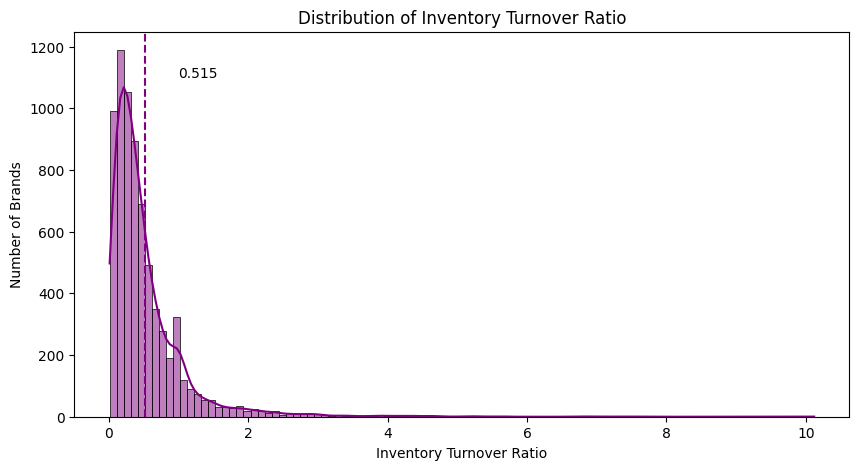

In [17]:
#Distribution of Inventory Turnover Ratio
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(turn_df7['InventoryTurnover'], kde= True, bins= 100, color= 'purple')
avg_line = turn_df7['InventoryTurnover'].mean()

plt.title('Distribution of Inventory Turnover Ratio')
plt.xlabel('Inventory Turnover Ratio')
plt.ylabel('Number of Brands')

plt.axvline(avg_line, color = 'purple', linestyle = '--', linewidth = 1.5)

plt.text(1, 1100, avg_line.round(3))

plt.show()

#### 4.2. Stock-to-Sales ratio (S2S)

In [83]:
S2S_df1 = sales_total[['Brand', 'Description', 'SalesDollars']].groupby(['Brand', 'Description']).sum()

S2S_df2 = pd.merge(turn_df7[['Brand', 'Description', 'AverageInventory']], pur_price[['Brand', 'Description', 'Price']], 
                   how= 'left',
                   on= ['Brand', 'Description'])

S2S_df2['AverageInventoryValue'] = S2S_df2['Price']*S2S_df2['AverageInventory']

S2S_df3 = pd.merge(S2S_df1, S2S_df2, 
                   how= 'right',
                   on= ['Brand', 'Description'])

S2S_df3['S2S'] = ((S2S_df3['AverageInventoryValue']/S2S_df3['SalesDollars']).astype(float)).round(2)

S2S_df3.head()

,Brand,Description,SalesDollars,AverageInventory,Price,AverageInventoryValue,S2S
0,58,Gekkeikan Black & Gold Sake,3741.12,353.02,12.99,4585.7298,1.23
1,60,Canadian Club 1858 VAP,1358.76,200.75,10.99,2206.2425,1.62
2,61,Margaritaville Silver,335.76,17.80,13.99,249.0220,0.74
3,62,Herradura Silver Tequila,6552.38,471.40,36.99,17437.0860,2.66
4,63,Herradura Reposado Tequila,5552.69,431.00,38.99,16804.6900,3.03


In [91]:
#Top 10 brands with the smallest S2S:
top10_S2S = S2S_df3[['Brand', 'Description', 'S2S']].sort_values(by='S2S', ascending= True)
print('Top 10 brands with the smallest S2S: \n', top10_S2S.head(10))

Top 10 brands with the smallest S2S: 
       Brand                   Description   S2S
4400  20550  Fifty Shades Of Grey Red Sat  0.13
3830  18017         Verde Sole Pnt Grigio  0.14
2122   6257       Carlo Rossi Blush Calif  0.18
2184   6472  Richards Wild Irish Rose Red  0.19
379    1059         Old St Nick's Egg Nog  0.19
6464  38103      Canyon Oaks Cab Svgn Cal  0.19
2261   6764     El Jimador Silver Tequila  0.20
2990  12378  Pacific Rim Organic Riesling  0.21
4474  20947              Catalpa Cab Svgn  0.21
7096  46371  Carlo Rossi RSV Cab Svgn Cal  0.21


### 5. Leadtime analysis

In [18]:
#Calculate Leadtime
pur_final['Leadtime'] = (pur_final['ReceivingDate'] - pur_final['PODate']).dt.days
pur_final.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Leadtime
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,12
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,10
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,11
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,10
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,9


In [19]:
#Average leadtime of each brand
Leadtime_df = pur_final[['Brand','Description', 'VendorName','Leadtime']]
brand_lt = Leadtime_df.groupby(['Brand','Description'], as_index=False)['Leadtime'].mean().sort_values(by = ['Leadtime'], ascending =True).reset_index(drop= True)
brand_lt.head()

,Brand,Description,Leadtime
0,14638,Bongiovanni Dolceo D'Alba,3.0
1,1887,House of Stuart Scotch,3.0
2,26324,Elizabeth Rose Pnt Nr,3.0
3,24287,Bollini RSV Pinot Grigio,3.0
4,738,Thatchers Organic Coffee Hou,3.0


In [20]:
#Min, max, average leadtime of suppliers
vendor_lt = Leadtime_df.groupby(['VendorName'], as_index=False).agg(Min_LT = ('Leadtime', 'min'),
                                                                    Max_LT = ('Leadtime', 'max'),
                                                                    Avg_LT = ('Leadtime', 'mean')).round(2).sort_values(by = ['Avg_LT'], ascending =True).reset_index(drop=True)
vendor_lt.head()

,VendorName,Min_LT,Max_LT,Avg_LT
0,TRUETT HURST,5,5,5.00
1,HIGHLAND WINE MERCHANTS LLC,3,9,5.32
2,LOYAL DOG WINERY,4,12,5.95
3,MARTIGNETTI COMPANIES,3,12,6.70
4,ALISA CARR BEVERAGES,3,12,6.81


In [21]:
#Top 10 vendors with the shortest leadtime:
top10 = vendor_lt.sort_values(by='Avg_LT', ascending= True)
print('Top 10 vendors with the shortest leadtime: \n', top10.head(10))

Top 10 vendors with the shortest leadtime: 
                         VendorName  Min_LT  Max_LT  Avg_LT
0      TRUETT HURST                      5       5    5.00
1      HIGHLAND WINE MERCHANTS LLC       3       9    5.32
2      LOYAL DOG WINERY                  4      12    5.95
3           MARTIGNETTI COMPANIES        3      12    6.70
4  ALISA CARR BEVERAGES                  3      12    6.81
5      Circa Wines                       3      12    6.95
6      PHILLIPS PRODUCTS CO.             3      13    7.01
7      SEA HAGG DISTILLERY LLC           3      13    7.02
8      NICHE W & S                       3      13    7.07
9      MOONLIGHT MEADERY                 3      14    7.08


In [22]:
#Define top risk of stockout based on Leadtime and Inventory Level
risk_df = pd.merge(brand_lt[['Brand', 'Description', 'Leadtime']], turn_df6[['Brand', 'Description','AverageInventory']], how= 'inner', on= ['Brand', 'Description'])

risk_df['RiskScore'] = (risk_df['Leadtime'] * (1-risk_df['AverageInventory'])).round(2)

top10_risk = risk_df[['Brand', 'Description', 'RiskScore']].sort_values(by='RiskScore', ascending= False)

print('Top 10 brands with the highest risk of stockout: \n', top10_risk.head(10))

Top 10 brands with the highest risk of stockout: 
       Brand                   Description  RiskScore
7024  15901    Merry Edwards Georg Pnt Nr      10.70
6191  21102       Taylor New York Marsala       8.60
5561  17909      Ravenswood Pickberry Red       8.21
5165  22647  Guillaume Vrignaud Chablis 1       8.00
5112  21856     Waterstone Chard Carneros       8.00
4988  25429  Ch Pesquie Quint Ventoux Red       8.00
4558  43542  Carlo Rossi RSV Cab Svgn Cal       7.88
3731  42676  Kistler Chard Sonma Mountain       7.71
2744  19454  J Vineyards Vin Gris Rose RR       7.56
1739   8581              Stagg Jr Bourbon       7.36


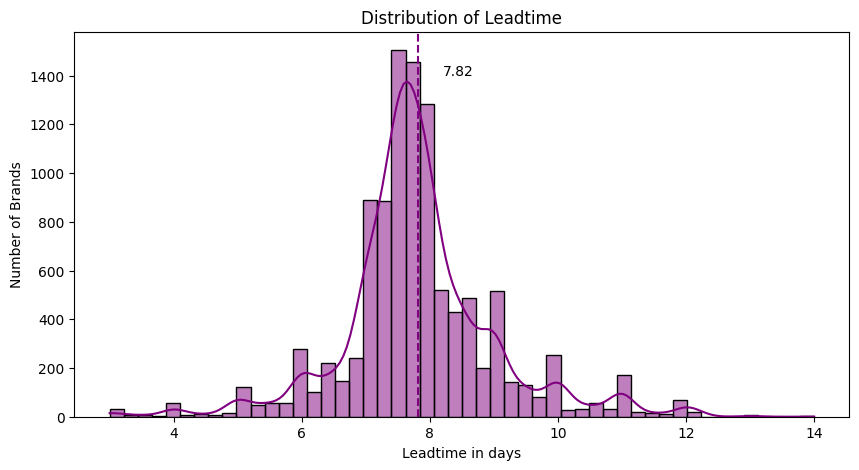

In [23]:
#Distribution of brand's leadtime
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(brand_lt['Leadtime'], kde= True, bins= 50, color= 'purple')
avg_line = brand_lt['Leadtime'].mean()

plt.title('Distribution of Leadtime')
plt.xlabel('Leadtime in days')
plt.ylabel('Number of Brands')

plt.axvline(avg_line, color = 'purple', linestyle = '--', linewidth = 1.5)

plt.text(8.2, 1400, avg_line.round(2))

plt.show()

### 6. Fixed-Order Quantity Models (recommend two Q optimal options)  

#### 6.1. The basic EOQ model 

##### Assumptions:
##### - Annual holding cost rate per unit per year equal to 12%
##### - The Order Placement Cost is the freight cost in inv_pur dataframe

In [24]:
h = 0.12

In [25]:
EOQ_df1 = pd.merge(COGS_df[['Brand', 'Description', 'SalesQuantity','SalesPrice', 'PurchasePrice']], sales_final[['Brand', 'Description', 'VendorNo', 'VendorName' ]], 
                   how= 'left', 
                   on= ['Brand', 'Description'])
EOQ_df1.rename(columns= {'VendorNo': 'VendorNumber'}, inplace= True)

order_placement_cost = inv_pur[['VendorNumber', 'VendorName', 'Freight' ]].groupby(['VendorNumber', 'VendorName'], as_index= False)['Freight'].mean().round(2)

EOQ_df3 = pd.merge(EOQ_df1, order_placement_cost, 
                   how= 'left', 
                   on= ['VendorNumber', 'VendorName'])
EOQ_df3.fillna(EOQ_df3['Freight'].mean(), inplace= True)
EOQ_df3 = EOQ_df3.groupby(['Brand', 'Description', 'SalesQuantity','SalesPrice', 'PurchasePrice'], as_index= False)['Freight'].mean()
EOQ_df3.rename(columns= {'Freight': 'OrderPlacementCost'}, inplace= True)

EOQ_df3.head()

,Brand,Description,SalesQuantity,SalesPrice,PurchasePrice,OrderPlacementCost
0,58,Gekkeikan Black & Gold Sake,288,12.99,9.28,57.31
1,60,Canadian Club 1858 VAP,4,9.99,7.40,2252.38
2,60,Canadian Club 1858 VAP,120,10.99,7.40,2252.38
3,61,Margaritaville Silver,24,13.99,10.60,914.43
4,62,Herradura Silver Tequila,50,36.99,28.67,1247.30


In [26]:
EOQ_df3['UnitHoldingCost'] = (h/6)*EOQ_df3['PurchasePrice']

EOQ_df3['EOQ'] = np.sqrt((2*EOQ_df3['SalesQuantity']*EOQ_df3['OrderPlacementCost'])/EOQ_df3['UnitHoldingCost'] ).round(2)

EOQ_df3.head()

,Brand,Description,SalesQuantity,SalesPrice,PurchasePrice,OrderPlacementCost,UnitHoldingCost,EOQ
0,58,Gekkeikan Black & Gold Sake,288,12.99,9.28,57.31,0.1856,421.73
1,60,Canadian Club 1858 VAP,4,9.99,7.40,2252.38,0.1480,348.93
2,60,Canadian Club 1858 VAP,120,10.99,7.40,2252.38,0.1480,1911.15
3,61,Margaritaville Silver,24,13.99,10.60,914.43,0.2120,455.02
4,62,Herradura Silver Tequila,50,36.99,28.67,1247.30,0.5734,466.40


#### 6.2. The EOQ model with planned Shortages (recommend Q optimal and SafetyStock)

![My Image](Screenshot_1.png)

In [27]:
EOQ_PS_df1 = EOQ_df3[['Brand', 'Description', 'SalesQuantity', 'SalesPrice', 'PurchasePrice', 'OrderPlacementCost', 'UnitHoldingCost']]

EOQ_PS_df1['UnitShortageCost'] = EOQ_PS_df1['SalesPrice']-EOQ_PS_df1['PurchasePrice']

EOQ_PS_df1['EOQ_PS'] = (np.sqrt((EOQ_PS_df1['UnitHoldingCost']+EOQ_PS_df1['UnitShortageCost'])/EOQ_PS_df1['UnitShortageCost'])*np.sqrt(2*EOQ_PS_df1['OrderPlacementCost']*EOQ_PS_df1['SalesQuantity']/EOQ_PS_df1['UnitHoldingCost'])).round(2)

EOQ_PS_df1['SafetyStock'] = ((EOQ_PS_df1['UnitHoldingCost']/(EOQ_PS_df1['UnitHoldingCost']+EOQ_PS_df1['UnitShortageCost']))*EOQ_PS_df1['EOQ_PS']).round(2)

EOQ_PS_df1['Max.InventoryLevel'] = EOQ_PS_df1['EOQ_PS'] - EOQ_PS_df1['SafetyStock']

EOQ_PS_df1.head()

,Brand,Description,SalesQuantity,SalesPrice,PurchasePrice,OrderPlacementCost,UnitHoldingCost,UnitShortageCost,EOQ_PS,SafetyStock,Max.InventoryLevel
0,58,Gekkeikan Black & Gold Sake,288,12.99,9.28,57.31,0.1856,3.71,432.15,20.59,411.56
1,60,Canadian Club 1858 VAP,4,9.99,7.40,2252.38,0.1480,2.59,358.76,19.39,339.37
2,60,Canadian Club 1858 VAP,120,10.99,7.40,2252.38,0.1480,3.59,1950.15,77.21,1872.94
3,61,Margaritaville Silver,24,13.99,10.60,914.43,0.2120,3.39,469.03,27.61,441.42
4,62,Herradura Silver Tequila,50,36.99,28.67,1247.30,0.5734,8.32,482.20,31.09,451.11


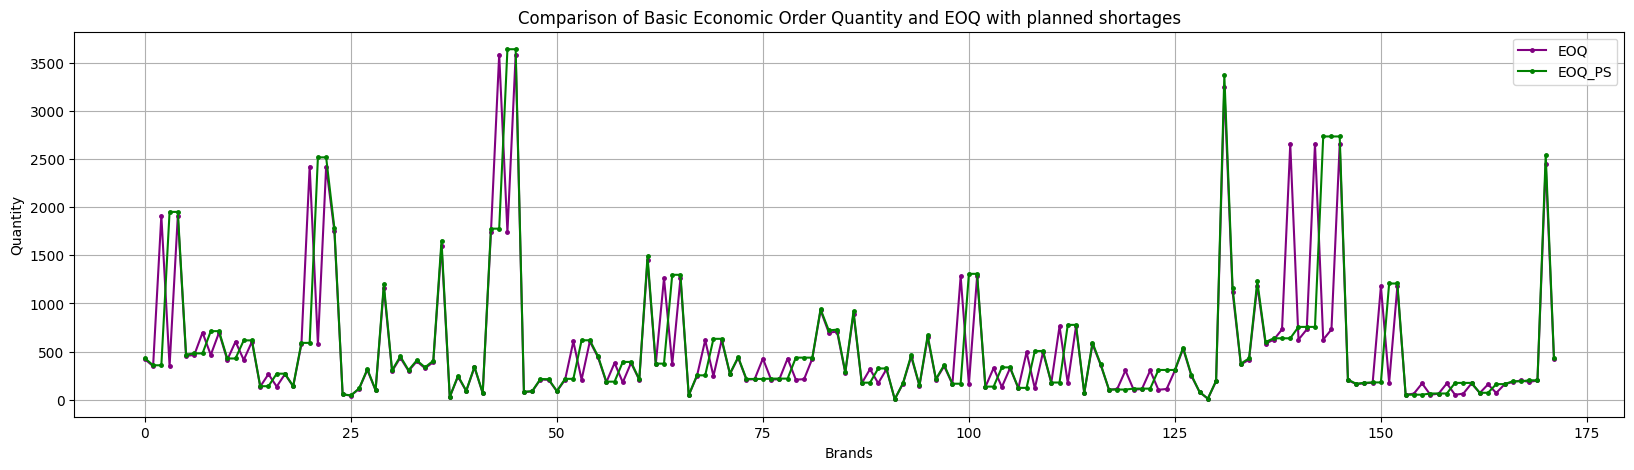

In [28]:
#The difference between basic EOQ and EOQ with planned shortages
EOQ_final = pd.merge(EOQ_PS_df1[['Brand', 'EOQ_PS']], EOQ_df3[['Brand', 'EOQ']], 
                     how= 'inner', 
                     on= 'Brand').reset_index(drop= True)

color = {'EOQ_PS': 'green', 'EOQ': 'purple'}

EOQ_final = EOQ_final.loc[EOQ_final['Brand'] <= 300] #limit the brand numbers of dataframe

EOQ_final[['EOQ', 'EOQ_PS']].plot(kind = 'line',
                                  figsize=(20,5),
                                  marker = 'o',
                                  markersize = 2.5,
                                  color = color)

plt.grid(True)
plt.title('Comparison of Basic Economic Order Quantity and EOQ with planned shortages')
plt.ylabel('Quantity')
plt.xlabel('Brands')

plt.show()

### 7. Reorder Point and SafetyStock

#### 7.1. ROP and SafetyStock of the basic EOQ model

#### - Cycle Service Level: Probability of not stockout = 0.95 (assumption)
#### - SafetyStock = Std During Leatime*Z-score
#### - ROP = Average daily demand*Leadtime + SafetyStock

In [29]:
CSL = 0.95

In [30]:
rop_df1 = turn_df1.pivot(index=['Brand', 'Description'], columns='TransactionDate', values='SalesQuantity').reset_index()

rop_df1.fillna(0, inplace= True)

rop_df1['AvgDailyDemand'] = rop_df1.iloc[: , 2:63].mean(axis=1)

rop_df1['Std'] = rop_df1.iloc[: , 2:63].std(axis=1)

rop_df2 = pd.merge(brand_lt, rop_df1[['Brand', 'Description', 'AvgDailyDemand','Std']], how= 'inner', on= ['Brand', 'Description'])

rop_df2['k'] = round(stats.norm(0, 1).ppf(CSL),2)

rop_df2['StdDuringLeadtime'] = rop_df2['Std']*np.sqrt(rop_df2['Leadtime'])

rop_df2['SafetyStock'] = (rop_df2['StdDuringLeadtime']*rop_df2['k']).round(2)

rop_df2['ROP'] = (rop_df2['Leadtime']*rop_df2['AvgDailyDemand'] + rop_df2['SafetyStock']).round(2)

rop_df2.sort_values(by='Brand', ascending= True, inplace= True)

rop_df2.head()

,Brand,Description,Leadtime,AvgDailyDemand,Std,k,StdDuringLeadtime,SafetyStock,ROP
3996,58,Gekkeikan Black & Gold Sake,7.758389,4.800000,4.548993,1.64,12.670712,20.78,58.02
3381,60,Canadian Club 1858 VAP,7.659794,2.066667,2.688659,1.64,7.441223,12.20,28.03
5422,61,Margaritaville Silver,8.115385,0.400000,2.154066,1.64,6.136398,10.06,13.31
1548,62,Herradura Silver Tequila,7.331570,2.700000,2.734349,1.64,7.403763,12.14,31.94
1522,63,Herradura Reposado Tequila,7.324427,2.183333,2.598023,1.64,7.031206,11.53,27.52


In [31]:
#Top 10 brands with the highest SafetyStock:
top10_df1 = rop_df2[['Brand', 'Description', 'SafetyStock']].sort_values(by='SafetyStock', ascending= False)
print('Top 10 brands with the highest SafetyStock: \n', top10_df1.head(10))

Top 10 brands with the highest SafetyStock: 
       Brand                   Description  SafetyStock
3123   8111             Smirnoff 80 Proof      1787.45
1625   4261        Capt Morgan Spiced Rum      1517.57
3539   1892                    Yukon Jack      1416.62
2667   5111  Dr McGillicuddy's Mentholmnt      1292.56
3638   3606      Smirnoff Raspberry Vodka      1171.77
1709   3545               Ketel One Vodka      1002.38
2088   3837                    Skyy Vodka       844.34
4088   6650                    Simi Chard       814.42
1766   8068              Absolut 80 Proof       766.64
2715   3405         Tito's Handmade Vodka       763.43


#### 7.2. ROP and SafetyStock of the EOQ model with planned shortages

![My Image](Screenshot_3.png)

In [32]:
#Calculate the ROP of EOQ with planned shortages model 
rop_eoq_ps = pd.merge(rop_df2[['Brand', 'Description', 'Leadtime', 'AvgDailyDemand']], EOQ_PS_df1[['Brand', 'Description', 'SafetyStock']], 
                      how= 'inner',
                      on= ['Brand', 'Description'])
rop_eoq_ps['ROP_EOQ_PS'] = rop_eoq_ps['AvgDailyDemand']*rop_eoq_ps['Leadtime'] - rop_eoq_ps['SafetyStock']
rop_eoq_ps.head()

,Brand,Description,Leadtime,AvgDailyDemand,SafetyStock,ROP_EOQ_PS
0,58,Gekkeikan Black & Gold Sake,7.758389,4.800000,20.59,16.650268
1,60,Canadian Club 1858 VAP,7.659794,2.066667,19.39,-3.559759
2,60,Canadian Club 1858 VAP,7.659794,2.066667,77.21,-61.379759
3,61,Margaritaville Silver,8.115385,0.400000,27.61,-24.363846
4,62,Herradura Silver Tequila,7.331570,2.700000,31.09,-11.294762


### 8. ABC classification

#### The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes.
![My Image](1701138646784.png)

In [11]:
#Create the ABC_df data frame by using relative data frame sales_total
ABC_df = sales_total.rename(columns={'SalesDollars':'RevenueGenerated'})
ABC_df.head()

,Brand,Description,SalesPrice,SalesQuantity,RevenueGenerated
0,58,Gekkeikan Black & Gold Sake,12.99,288,3741.12
1,60,Canadian Club 1858 VAP,9.99,4,39.96
2,60,Canadian Club 1858 VAP,10.99,120,1318.80
3,61,Margaritaville Silver,13.99,24,335.76
4,62,Herradura Silver Tequila,36.99,50,1849.50


In [12]:
#Create function
def ABC_segmentation(perc):
    if perc > 0 and perc < 0.8:
        return 'A'
    elif perc >= 0.8 and perc < 0.95:
        return 'B'
    elif perc >= 0.95:
        return 'C'

In [13]:
#Calculate total revenue of each Brand
data_seg = ABC_df.groupby(['Brand','Description', 'SalesPrice'], as_index= False)['RevenueGenerated'].sum()

#Order by revenue
data_seg = data_seg.sort_values(by = ['RevenueGenerated'], ascending =False).reset_index()

#Create the column of the total sum revenue
data_seg['TotalRev'] = data_seg['RevenueGenerated'].sum()

#Create the column of percentage of Revenue per Brand
data_seg['%Rev'] = 100*(data_seg['RevenueGenerated']/data_seg['TotalRev'])

#Create the column of the cumulative revenue per Brand
data_seg['CumRev'] = data_seg['RevenueGenerated'].cumsum()

#Create the column of the running percentage of CumRev
data_seg['PerCumTot'] = data_seg['CumRev']/data_seg['TotalRev']

# Create the column of the class by apply ABC_segmentation
data_seg['Class'] = data_seg['PerCumTot'].apply(ABC_segmentation)

#Create SKU_ID column
data_seg['SKU_ID'] = pd.Series(range(1, len(data_seg['PerCumTot']) + 1)).astype(int)

#Cumulative Percent of SKU
data_seg['SKU_%'] = (100 * pd.Series(range(1, len(data_seg['PerCumTot']) + 1)) / (len(data_seg['PerCumTot']) + 1))

#Drop index column
data_seg.drop(columns='index', inplace=True)

data_seg.head(5)

,Brand,Description,SalesPrice,RevenueGenerated,TotalRev,%Rev,CumRev,PerCumTot,Class,SKU_ID,SKU_%
0,4261,Capt Morgan Spiced Rum,21.99,443868.15,33139375.29,1.339398,443868.15,0.013394,A,1,0.009116
1,1233,Jack Daniels No 7 Black,35.99,344712.22,33139375.29,1.040189,788580.37,0.023796,A,2,0.018232
2,3545,Ketel One Vodka,29.99,335558.11,33139375.29,1.012566,1124138.48,0.033922,A,3,0.027347
3,3405,Tito's Handmade Vodka,29.99,249756.72,33139375.29,0.753655,1373895.20,0.041458,A,4,0.036463
4,3858,Grey Goose Vodka,23.99,224762.31,33139375.29,0.678233,1598657.51,0.048240,A,5,0.045579


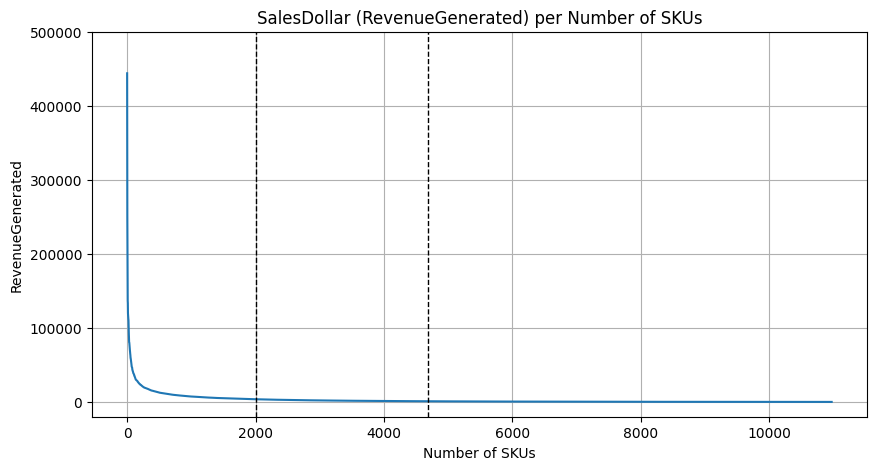

In [14]:
#Distribution of SalesDollars by Quantity of SKU
fig, ax = plt.subplots(figsize = (10,5))
y_axis = pd.Series(range(1, len(data_seg['RevenueGenerated']) + 1))

lineA = data_seg[data_seg.Class == 'A']['Class'].count()
lineB = (data_seg[data_seg.Class == 'A']['Class'].count()) + (data_seg[data_seg.Class == 'B']['Class'].count())

plt.plot(y_axis, data_seg['RevenueGenerated'])
plt.ylabel('RevenueGenerated')
plt.xlabel('Number of SKUs')
plt.title('SalesDollar (RevenueGenerated) per Number of SKUs')

plt.axvline(lineA , color="black", linestyle="--", linewidth = 1.0)
plt.axvline(lineB , color="black", linestyle="--", linewidth = 1.0)

plt.grid(True)
plt.ylim((-20000,500000))
plt.show()

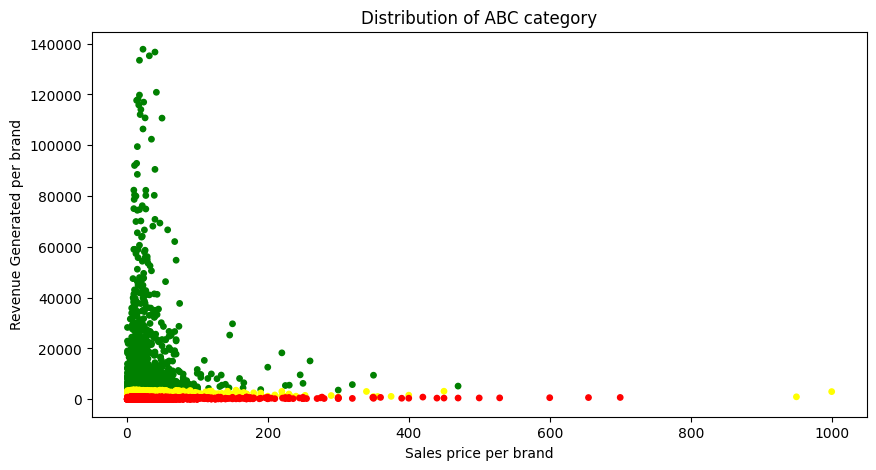

In [27]:
#Distribution of ABC category
plt.figure(figsize=(10,5))
colors = {'A':'green', 'B':'yellow', 'C':'red'}

data_seg1 = data_seg[data_seg['SalesPrice']<1000].copy() #Remove outliers
data_seg1 = data_seg1[data_seg1['RevenueGenerated']<150000].copy() #Remove outliers

plt.scatter(data_seg1['SalesPrice'], data_seg1['RevenueGenerated'], color=data_seg1['Class'].map(colors), s= 15)
plt.xlabel('Sales price per brand')
plt.ylabel('Revenue Generated per brand')
plt.title('Distribution of ABC category')

plt.show()

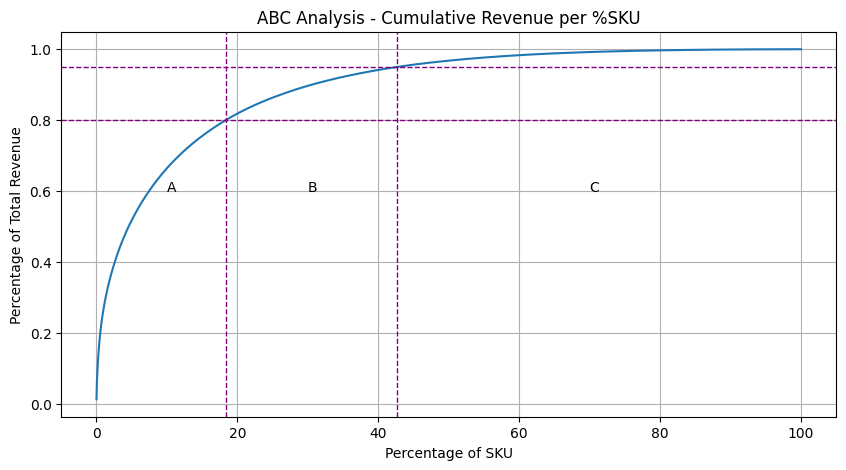

In [28]:
#Distribution of % Total Revenue by % SKU
fig, ax = plt.subplots(figsize = (10,5))
lineA = 100*data_seg[data_seg.Class == 'A']['Class'].count()/data_seg['RevenueGenerated'].count()
lineB = 100*((data_seg[data_seg.Class == 'A']['Class'].count()/data_seg['RevenueGenerated'].count()) + (data_seg[data_seg.Class == 'B']['Class'].count()/data_seg['RevenueGenerated'].count()))

plt.plot(data_seg['SKU_%'], data_seg['PerCumTot'])
plt.xlabel('Percentage of SKU')
plt.ylabel('Percentage of Total Revenue')
plt.title('ABC Analysis - Cumulative Revenue per %SKU')

plt.axvline(lineA , color="purple", linestyle="--", linewidth = 1.0)
plt.axvline(lineB , color="purple", linestyle="--", linewidth = 1.0)

plt.axhline(0.8 , color="purple", linestyle="--", linewidth = 1.0)
plt.axhline(0.95 , color="purple", linestyle="--", linewidth = 1.0)

plt.text(10, 0.6, 'A')  
plt.text(30, 0.6, 'B')  
plt.text(70, 0.6, 'C ')  

plt.grid(True)
plt.show()

### 9. XYZ classification

In [39]:
#Create the XYZ_df data frame by selecting relative columns of sales_final data frame
XYZ_df = sales_final[['Brand', 'Description', 'SalesDate', 'SalesQuantity']].groupby(['Brand', 'Description', 'SalesDate'], as_index=False)['SalesQuantity'].sum()
XYZ_df.head()

,Brand,Description,SalesDate,SalesQuantity
0,58,Gekkeikan Black & Gold Sake,2016-01-01,7
1,58,Gekkeikan Black & Gold Sake,2016-01-02,13
2,58,Gekkeikan Black & Gold Sake,2016-01-03,7
3,58,Gekkeikan Black & Gold Sake,2016-01-04,3
4,58,Gekkeikan Black & Gold Sake,2016-01-05,5


In [40]:
#Long to wide data frame
XYZ_df = XYZ_df.pivot(index=['Brand', 'Description'], columns='SalesDate', values='SalesQuantity')
XYZ_df.head()

,SalesDate,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,...,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29
Brand,Description,,,,,,,,,,,,,,,,,,,,,
58,Gekkeikan Black & Gold Sake,7.0,13.0,7.0,3.0,5.0,4.0,6.0,10.0,9.0,6.0,...,4.0,NaN,1.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN
60,Canadian Club 1858 VAP,3.0,9.0,5.0,3.0,1.0,3.0,3.0,7.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Margaritaville Silver,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Herradura Silver Tequila,3.0,6.0,6.0,NaN,NaN,5.0,4.0,11.0,9.0,NaN,...,4.0,3.0,2.0,1.0,NaN,4.0,NaN,NaN,2.0,NaN
63,Herradura Reposado Tequila,8.0,8.0,1.0,NaN,1.0,2.0,4.0,10.0,2.0,NaN,...,3.0,1.0,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN


In [41]:
#A day with a null value is a day where no product was sold:
XYZ_df.replace(np.nan, 0, inplace=True)
XYZ_df.reset_index()

SalesDate,Brand,Description,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,...,2016-02-20 00:00:00,2016-02-21 00:00:00,2016-02-22 00:00:00,2016-02-23 00:00:00,2016-02-24 00:00:00,2016-02-25 00:00:00,2016-02-26 00:00:00,2016-02-27 00:00:00,2016-02-28 00:00:00,2016-02-29 00:00:00
0,58,Gekkeikan Black & Gold Sake,7.0,13.0,7.0,3.0,5.0,4.0,6.0,10.0,...,4.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0
1,60,Canadian Club 1858 VAP,3.0,9.0,5.0,3.0,1.0,3.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,Margaritaville Silver,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,Herradura Silver Tequila,3.0,6.0,6.0,0.0,0.0,5.0,4.0,11.0,...,4.0,3.0,2.0,1.0,0.0,4.0,0.0,0.0,2.0,0.0
4,63,Herradura Reposado Tequila,8.0,8.0,1.0,0.0,1.0,2.0,4.0,10.0,...,3.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7654,90085,Ch Lilian 09 Ladouys St Este,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7655,90086,La Dame Montrose St Estep 11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7656,90087,Ch Mouton Rothschild 12 Paui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Create function
def XYZ_segmentation(cv):
    if cv < 1:
        return 'X'
    elif cv >= 1 and cv <= 2:
        return 'Y'
    elif cv > 2:
        return 'Z'

In [43]:
#Calculate Average Demand of each brand
XYZ_df['AvgDemand'] = XYZ_df.iloc[: , 0:60].mean(axis=1)

#Calculate STD Demand of each brand
XYZ_df['StdDemand'] = XYZ_df.iloc[: , 0:60].std(axis=1)

#Calculate CV of each brand
XYZ_df['CV'] = XYZ_df['StdDemand']/XYZ_df['AvgDemand']

#Order by CV
XYZ_df.sort_values(by=['CV'], ascending= True, inplace= True)

#Create Class column by Apply function
XYZ_df['Class'] = XYZ_df['CV'].apply(XYZ_segmentation)

#Reset index of data frame
XYZ_df.reset_index(['Brand', 'Description'], inplace=True)

XYZ_df.head()

SalesDate,Brand,Description,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,...,2016-02-24 00:00:00,2016-02-25 00:00:00,2016-02-26 00:00:00,2016-02-27 00:00:00,2016-02-28 00:00:00,2016-02-29 00:00:00,AvgDemand,StdDemand,CV,Class
0,3687,Fleischmanns Royal Traveler,44.0,74.0,65.0,34.0,35.0,42.0,31.0,71.0,...,15.0,5.0,18.0,26.0,13.0,12.0,28.666667,15.942340,0.556128,X
1,12213,Evodia Garnacha Old Vine,10.0,39.0,19.0,14.0,7.0,35.0,14.0,27.0,...,16.0,18.0,40.0,22.0,33.0,1.0,22.516667,13.420818,0.596039,X
2,12220,Angeline Pnt Nr,18.0,31.0,23.0,16.0,23.0,43.0,29.0,39.0,...,17.0,33.0,60.0,37.0,10.0,4.0,34.250000,21.530920,0.628640,X
3,26463,Ravenswood Vints Blend Znfdl,32.0,60.0,16.0,5.0,9.0,11.0,9.0,16.0,...,9.0,32.0,43.0,30.0,8.0,11.0,20.166667,13.267990,0.657917,X
4,4359,Mr Boston Light Rum,26.0,57.0,26.0,12.0,7.0,22.0,21.0,29.0,...,18.0,21.0,5.0,14.0,14.0,1.0,19.183333,12.829378,0.668777,X


### 10. Integration of ABC and XYZ analysis

In [44]:
#Merge two data frames 
ABC_XYZ_df = pd.merge(data_seg[['Brand', 'Description', 'Class']], XYZ_df[['Brand', 'Description', 'Class']], how= 'inner', on= ['Brand', 'Description'])
ABC_XYZ_df.head()

,Brand,Description,Class_x,Class_y
0,4227,Bacardi Superior Rum Trav,A,X
1,2757,Johnnie Walker Red Label,A,X
2,1376,Jim Beam,A,X
3,8680,Crown Royal,A,Y
4,5364,Kahlua,A,X


In [45]:
#Create Combine column
ABC_XYZ_df['Combine'] = (ABC_XYZ_df['Class_x']+ABC_XYZ_df['Class_y']).astype(str)
ABC_XYZ_df.head()

,Brand,Description,Class_x,Class_y,Combine
0,4227,Bacardi Superior Rum Trav,A,X,AX
1,2757,Johnnie Walker Red Label,A,X,AX
2,1376,Jim Beam,A,X,AX
3,8680,Crown Royal,A,Y,AY
4,5364,Kahlua,A,X,AX


In [46]:
#Number of Brands of each category:
print ('Number of High Sales - Very little variation brands (AX):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'AX']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'AX']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of High Sales - Some variation brands (AY):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'AY']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'AY']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of High Sales - The most variation brands (AZ):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'AZ']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'AZ']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of Medium Sales - Very little variation brands (BX):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'BX']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'BX']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of Medium Sales - Some variation brands (BY):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'BY']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'BY']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of Medium Sales - The most variation brands (BZ):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'BZ']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'BZ']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of Low Sales - Very little variation brands (CX):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'CX']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'CX']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of Low Sales - Some variation brand (CY):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'CY']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'CY']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')
print ('Number of Low Sales - The most variation brands (CZ):', ABC_XYZ_df[ABC_XYZ_df.Combine == 'CZ']['Combine'].count(), 
       ((ABC_XYZ_df[ABC_XYZ_df.Combine == 'CZ']['Combine'].count()/ABC_XYZ_df.shape[0])*100).round(2), '%')

Number of High Sales - Very little variation brands (AX): 491 4.48 %
Number of High Sales - Some variation brands (AY): 1414 12.9 %
Number of High Sales - The most variation brands (AZ): 100 0.91 %
Number of Medium Sales - Very little variation brands (BX): 247 2.25 %
Number of Medium Sales - Some variation brands (BY): 1870 17.06 %
Number of Medium Sales - The most variation brands (BZ): 549 5.01 %
Number of Low Sales - Very little variation brands (CX): 120 1.09 %
Number of Low Sales - Some variation brand (CY): 2170 19.8 %
Number of Low Sales - The most variation brands (CZ): 4001 36.5 %
